In [35]:
from egttools.plotting.simplified import plot_pairwise_comparison_rule_dynamics_in_simplex_without_roots
import egttools as egt

In [42]:
# Payoff marix
V = 2; D = 7; T = 1; F = 5; S = 9
A = np.array([
        [ (V-D)/2, V, 0], # Hawk
        [ 0      , (V/2) - T, F], # Dove
        [ 0      , S, 0] # Human
    ])
type_labels = ['Hawk', 'Dove', 'Human']

  (0, 0)	0.99
  (0, 1)	0.005
  (0, 2)	0.005
  (1, 0)	0.0008331571583528664
  (1, 1)	0.9801
  (1, 2)	5e-05
  (1, 3)	0.014066842841647135
  (1, 4)	0.00495
  (2, 0)	0.0008187107062259054
  (2, 1)	5e-05
  (2, 2)	0.9801
  (2, 4)	0.00495
  (2, 5)	0.014081289293774094
  (3, 1)	0.0017166489821250305
  (3, 3)	0.9704
  (3, 4)	0.0001
  (3, 6)	0.02288335101787497
  (3, 7)	0.0049
  (4, 1)	0.0007796494217893423
  (4, 2)	0.0008074087549843517
  (4, 3)	9.899003638215689e-05
  (4, 4)	0.9703
  (4, 5)	0.00010100996361784312
  (4, 7)	0.013942591245015649
  (4, 8)	0.013970350578210656
  :	:
  (5145, 5145)	0.9425
  (5145, 5146)	0.0008591974794063226
  (5146, 5045)	0.0048
  (5146, 5046)	0.0002
  (5146, 5145)	0.04277173216327646
  (5146, 5146)	0.9516
  (5146, 5147)	0.0006282678367235354
  (5147, 5046)	0.00485
  (5147, 5047)	0.00015
  (5147, 5146)	0.0336678363656187
  (5147, 5147)	0.9609
  (5147, 5148)	0.0004321636343812965
  (5148, 5047)	0.0049
  (5148, 5048)	0.0001
  (5148, 5147)	0.0243348021419742
  (5148, 

(-0.02, 0.9160254037844386)

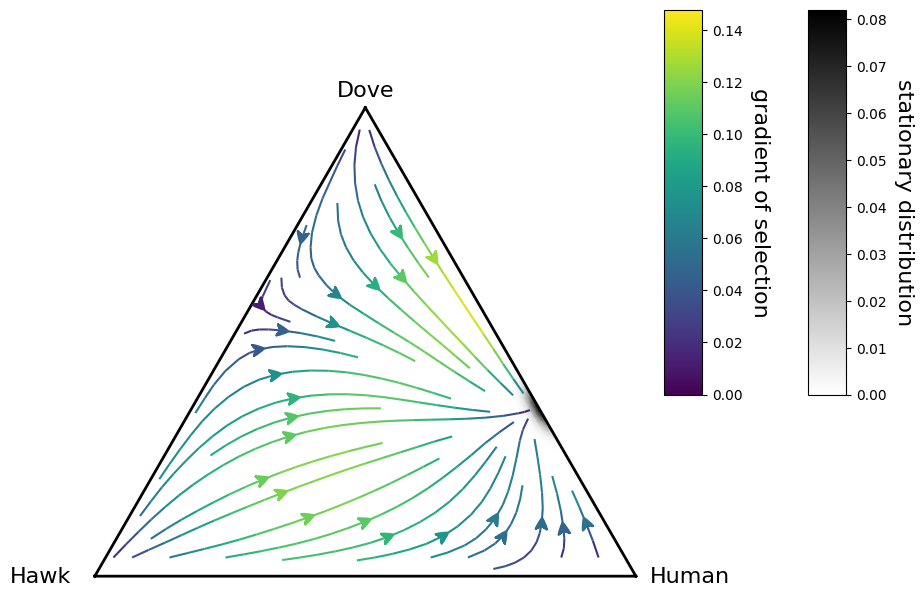

In [43]:
fig, ax = plt.subplots(figsize=(12,10))

simplex, gradient_functionm, game, evolver = plot_pairwise_comparison_rule_dynamics_in_simplex_without_roots(payoff_matrix=A,
                                                                                                             group_size=2,
                                                                                                             population_size=Z,
                                                                                                             beta=beta,
                                                                                                             ax=ax)

transitions = evolver.calculate_transition_matrix(beta=beta, mu=mu)
sd = egt.utils.calculate_stationary_distribution(transitions.transpose())

print(transitions)
print(sd)

plot = (simplex
           .draw_triangle()
           .add_vertex_labels(type_labels, epsilon_bottom=0.1, epsilon_top=0.03)
           .draw_stationary_distribution(sd, alpha=1, shrink=0.5,
                                         edgecolors='gray', cmap='binary', shading='gouraud', zorder=0)
           .draw_gradients(zorder=2, linewidth=1.5)
           .add_colorbar(shrink=0.5)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))